<a href="https://colab.research.google.com/github/jimenazo97/Imageviewer/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np  
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses 
from keras import optimizers
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  

In [0]:
from keras.datasets import cifar10
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar10.load_data()
#(x_train_original[43])

170500096/170498071 [==============================] - 351s 2us/step


In [0]:
#OneHot
y_train = np_utils.to_categorical(y_train_original, 10)  
y_test = np_utils.to_categorical(y_test_original, 10)
(y_train[43])

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

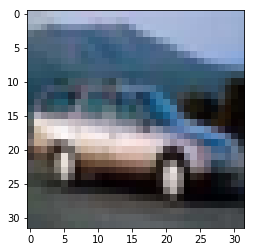

In [0]:

imgplot = plt.imshow(x_train_original[4])  
plt.show()  

In [0]:
x_train = x_train_original/255  
x_test = x_test_original/255 
#x_train[43]

In [0]:
K.set_image_data_format('channels_last')  
K.set_learning_phase(1)

In [0]:
def create_simple_cnn():  
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  return model

In [0]:
scnn_model = create_simple_cnn()  
scnn_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adadelta(), metrics=['acc', 'mse'])

In [0]:
scnn_model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 512)         1180160   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 512)         0         
__________

In [0]:
scnn = scnn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 42s 831us/step - loss: 1.8228 - acc: 0.3234 - mean_squared_error: 0.0775 - val_loss: 1.6285 - val_acc: 0.4623 - val_mean_squared_error: 0.0702
Epoch 2/10
50000/50000 [==============================] - 34s 675us/step - loss: 1.2171 - acc: 0.5717 - mean_squared_error: 0.0555 - val_loss: 1.0498 - val_acc: 0.6352 - val_mean_squared_error: 0.0484
Epoch 3/10
50000/50000 [==============================] - 34s 688us/step - loss: 0.9430 - acc: 0.6739 - mean_squared_error: 0.0438 - val_loss: 1.0145 - val_acc: 0.6665 - val_mean_squared_error: 0.0458
Epoch 4/10
50000/50000 [==============================] - 34s 681us/step - loss: 0.7591 - acc: 0.7411 - mean_squared_error: 0.0357 - val_loss: 1.0430 - val_acc: 0.6838 - val_mean_squared_error: 0.0445
Epoch 5/10
50000/50000 [==============================] - 34s 686us/step - loss: 0.6274 - acc: 0.7

In [0]:
cnn_evaluation = scnn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)  
cnn_evaluation 

10000/10000 [==============================] - 2s 153us/step


[1.2432280014038086, 0.7745, 0.03665154003202915]

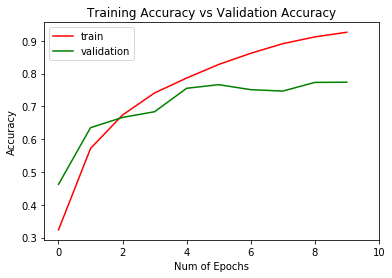

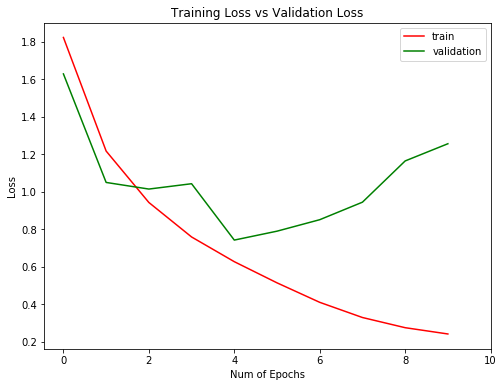

In [0]:
plt.figure(0)  
plt.plot(scnn.history['acc'],'r')  
plt.plot(scnn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(scnn.history['loss'],'r')  
plt.plot(scnn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  